Sample demo of SASpy Set up

In [1]:
import saspy

The sas configuration value `sascfg` passed on session creation stems from the saspy config file that invokes IOM method to talk to sas. This same technique can be used for Server SAS (including Grid) or Desktop SAS - across all supported OS (Win/Linux)

In [2]:
sas = saspy.SASsession(sascfg = 'winlocal')

Please enter the name of the SAS Config you wish to run. Available Configs are: ['default', 'winlocal'] winlocal
SAS Connection established. Subprocess id is 31760



In [3]:
stat = sas.sasstat()

In [4]:
dir(stat) #SAS STAT objects available from python

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'glm',
 'hplogistic',
 'hpreg',
 'hpsplit',
 'logger',
 'logistic',
 'mixed',
 'reg',
 'sas',
 'sasproduct',
 'tpspline']

In [5]:
ml = sas.sasml()
dir(ml) #EM PROCS available via native python objects

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cluster',
 'forest',
 'hp4score',
 'hpbnet',
 'logger',
 'neural',
 'sas',
 'sasproduct',
 'treeboost']

In [24]:
ets = sas.sasets()
dir(ets) #ETS PROCS available via native python objects

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'arima',
 'esm',
 'logger',
 'sas',
 'sasproduct',
 'timedata',
 'timeid',
 'timeseries',
 'ucm']

Some Basic Analysis

In [7]:
cars = sas.sasdata('cars', libref='sashelp')

In [8]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6,225,18,24,3880,115,197



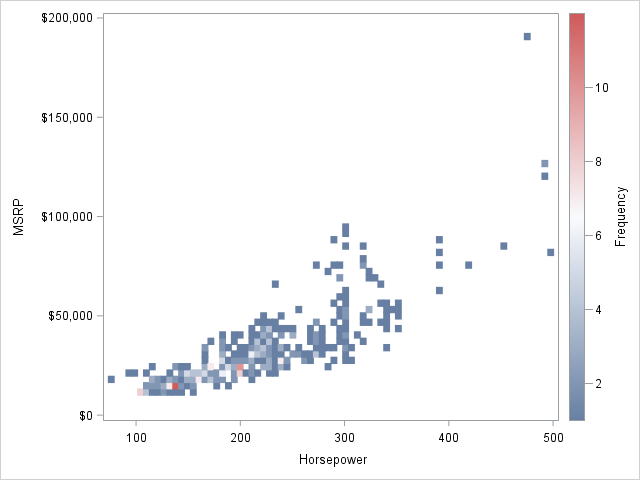

In [11]:
cars.heatmap('Horsepower', 'msrp')


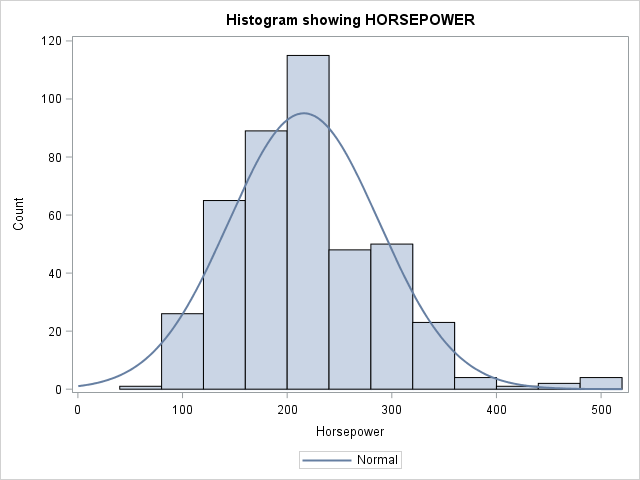


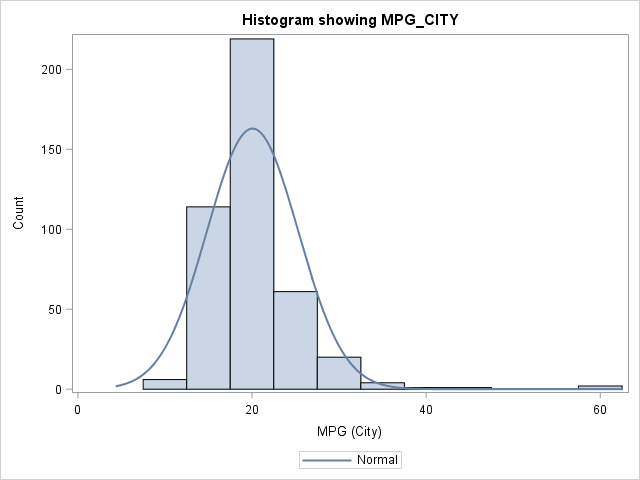


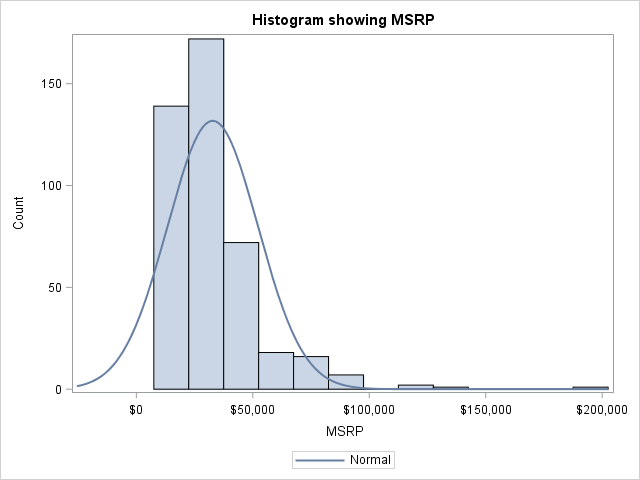

In [25]:
for col in ['horsepower','MPG_City', 'MSRP']:


    cars.hist(col, title='Histogram showing '+col.upper())

##### Learn SAS from the python console

In [58]:
sas.teach_me_SAS(True)
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)
sas.teach_me_SAS(False)

%macro proccall(d);
proc reg data=sashelp.cars plot=all  ;
model horsepower = Cylinders EngineSize;
run; quit; %mend;
%mangobj(reg0010,reg,cars);


In [59]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)

In [60]:
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

In [43]:
stat_results.FITSTATISTICS

,Label1,cValue1,nValue1,Label2,cValue2,nValue2
0,Root MSE,41.10897,41.108975,R-Square,0.6755,0.675460
1,Dependent Mean,215.87793,215.877934,Adj R-Sq,0.6739,0.673926
2,Coeff Var,19.04269,19.042694,,,0.000000


In [44]:
stat_results.PARAMETERESTIMATES

,Variable,DF,Estimate,StdErr,tValue,Probt,Label
0,Intercept,1,9.766817,8.023541,1.217270,2.241801e-01,Intercept
1,Cylinders,1,23.702956,3.054032,7.761202,6.382821e-14,
2,EngineSize,1,21.354879,4.313046,4.951229,1.067389e-06,Engine Size (L)


What if there is some syntax error or an error in the expression?

In [55]:
err_results = stat.reg(model='horsepowe = Cyinders EngineSize',data=cars)

In [56]:
dir(err_results)

['ERROR_LOG']

In [57]:
err_results.ERROR_LOG

Easily convert SAS data files to a pandas dataframe

In [61]:
cars_pandas = cars.to_df()

In [62]:
cars_pandas.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6,225,18,24,3880,115,197


In [ ]:
ml.forest()